# **EDA Default Probability Prediction**

In [19]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from pypalettes import load_cmap
from matplotlib.colors import ListedColormap
import numpy as np
import warnings
import squarify
import statsmodels
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from scipy.stats import skew

Esta base de datos contiene perfiles anonimizados y caracteristicas que se han recopilado de la cuenta de cada cliente. Con el fin, de mejorar la predicción de impago de crédito.

Contamos con dos dataset para entrenamiento, uno llamado trainlabels que contiene todas las etiquetas anomimas de cada cliente, y testdata que contiene los datos de prueba que utilizaremos para predecir la etiqueta objetivo de cada cliente.

### **Análisis Exploratorio de Datos**

Para este problema, contamos dos bases de datos para el entrenamiento, en donde **trainlabels** contiene todas las etiquetas objetivo para cada ``customer_ID`` y **traindata** contiene todos los datos de entrenamiento con multiples fechas de estado de cuenta por ``customer_ID``.

In [12]:
trainlabels = pd.read_csv(r'C:\Users\Usuario\Downloads\train_labels.csv')

In [14]:
trainlabels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458913 entries, 0 to 458912
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   customer_ID  458913 non-null  object
 1   target       458913 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 7.0+ MB


Podemos observar que este dataset contiene dos variables y esta son ``customer_ID`` que es una variable categorica y otra variable llamada ``target`` que es una variable númerica.

In [4]:
trainlabels.head(10)

,customer_ID,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0
1,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,0
2,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,0
3,000041bdba6ecadd89a52d11886e8eaaec9325906c9723...,0
4,00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...,0
5,000084e5023181993c2e1b665ac88dbb1ce9ef621ec537...,0
6,000098081fde4fd64bc4d503a5d6f86a0aedc425c96f52...,0
7,0000d17a1447b25a01e42e1ac56b091bb7cbb06317be4c...,0
8,0000f99513770170a1aba690daeeb8a96da4a39f11fc27...,1
9,00013181a0c5fc8f1ea38cd2b90fe8ad2fa8cad9d9f13e...,1


Ahora cargaremos la base de datos que contiene los datos de entrenamiento.

In [15]:
traindata = pd.read_csv(r'C:\Users\Usuario\Downloads\train_data.csv')

In [8]:
traindata.shape

(5531451, 190)

Podemos observar que esta base contiene un número de **5.531,451** filas y **190** columnas.

In [21]:
traindata.head(10)

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,0.938469,0.001733,0.008724,1.006838,0.009228,0.124035,0.008771,0.004709,...,NaN,NaN,NaN,0.002427,0.003706,0.003818,NaN,0.000569,0.000610,0.002674
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,0.936665,0.005775,0.004923,1.000653,0.006151,0.126750,0.000798,0.002714,...,NaN,NaN,NaN,0.003954,0.003167,0.005032,NaN,0.009576,0.005492,0.009217
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-05-28,0.954180,0.091505,0.021655,1.009672,0.006815,0.123977,0.007598,0.009423,...,NaN,NaN,NaN,0.003269,0.007329,0.000427,NaN,0.003429,0.006986,0.002603
3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-06-13,0.960384,0.002455,0.013683,1.002700,0.001373,0.117169,0.000685,0.005531,...,NaN,NaN,NaN,0.006117,0.004516,0.003200,NaN,0.008419,0.006527,0.009600
4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-07-16,0.947248,0.002483,0.015193,1.000727,0.007605,0.117325,0.004653,0.009312,...,NaN,NaN,NaN,0.003671,0.004946,0.008889,NaN,0.001670,0.008126,0.009827
5,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-08-04,0.945964,0.001746,0.007863,1.005006,0.004220,0.110946,0.009857,0.009866,...,NaN,NaN,NaN,0.001924,0.008598,0.004529,NaN,0.000674,0.002223,0.002884
6,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-09-18,0.940705,0.002183,0.018859,1.008024,0.004509,0.103329,0.006603,0.000783,...,NaN,NaN,NaN,0.001336,0.004361,0.009387,NaN,0.007727,0.007661,0.002225
7,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-10-08,0.914767,0.003029,0.014324,1.000242,0.000263,0.108115,0.009527,0.007836,...,NaN,NaN,NaN,0.002397,0.008452,0.005553,NaN,0.001831,0.009616,0.007385
8,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-11-20,0.950845,0.009896,0.016888,1.003995,0.001789,0.102792,0.002519,0.009817,...,NaN,NaN,NaN,0.009742,0.003968,0.007945,NaN,0.008722,0.004369,0.000995
9,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-12-04,0.868580,0.001082,0.001930,1.007504,0.001772,0.100470,0.004626,0.006073,...,NaN,NaN,NaN,0.003611,0.009607,0.007266,NaN,0.008763,0.004753,0.009068


Procederemos a analizar el tipo de variables que contiene este dataset.

In [17]:
traindata.dtypes

customer_ID     object
S_2             object
P_2            float64
D_39           float64
B_1            float64
                ...   
D_141          float64
D_142          float64
D_143          float64
D_144          float64
D_145          float64
Length: 190, dtype: object

In [16]:
num_variables = traindata.select_dtypes(include=['int64', 'float64']).shape[1]
cat_variables = traindata.select_dtypes(include=['object', 'category']).shape[1]

print(f"Variables numéricas: {num_variables}")
print(f"Variables categóricas: {cat_variables}")

Variables numéricas: 186
Variables categóricas: 4


Notamos que el dataset contiene un total de 186 variables numéricas y 4 variables categoricas. Sin embargo, analizando a detalle las variables notamos que algunas variables estaban siendo identificadas como númericas pero estas eran categoricas ordinales, asi que, más adelante se les dará el trato correspondiente. 

In [20]:
traindata.describe()

,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,D_43,...,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
count,5.485466e+06,5.531451e+06,5.531451e+06,5.529435e+06,5.531451e+06,4.510907e+06,5.529435e+06,5.529435e+06,791314.000000,3.873055e+06,...,1.946990e+05,1.946990e+05,1.946990e+05,5.429903e+06,5.490819e+06,5.429903e+06,944408.000000,5.429903e+06,5.490724e+06,5.429903e+06
mean,6.563340e-01,1.531172e-01,1.240100e-01,6.214887e-01,7.880270e-02,2.258455e-01,5.978469e-02,1.325389e-01,0.184974,1.546841e-01,...,2.427725e-01,1.424409e-02,1.646183e-01,1.789305e-01,2.664348e-02,1.645212e-01,0.390799,1.788022e-01,5.238952e-02,6.233496e-02
std,2.446494e-01,2.700709e-01,2.119869e-01,4.014877e-01,2.263971e-01,1.933475e-01,2.025443e-01,2.349929e-01,0.228185,2.133977e-01,...,2.101320e-01,9.571115e-02,2.670208e-01,3.790614e-01,1.455480e-01,3.482771e-01,0.236182,3.789498e-01,1.825135e-01,1.934937e-01
min,-4.589548e-01,5.026190e-09,-7.588799e+00,9.192280e-09,1.534223e-09,-6.271320e-01,5.566545e-10,6.285293e-09,-0.000454,1.154550e-07,...,6.316773e-08,1.078787e-08,3.307923e-08,3.767347e-10,3.725073e-09,1.650100e-10,-0.014539,5.549692e-09,2.500991e-09,1.226024e-09
25%,4.803307e-01,4.528464e-03,8.863645e-03,1.053313e-01,2.895934e-03,1.272588e-01,2.873244e-03,5.227570e-03,0.037516,4.227546e-02,...,9.314305e-03,2.532470e-03,3.517452e-03,3.027212e-03,2.555848e-03,3.026087e-03,0.199399,3.028116e-03,2.752896e-03,3.028347e-03
50%,6.942950e-01,9.056902e-03,3.132968e-02,8.143328e-01,5.782230e-03,1.639082e-01,5.746725e-03,9.777230e-03,0.120519,8.851245e-02,...,2.539468e-01,5.069830e-03,7.037814e-03,6.053010e-03,5.110523e-03,6.051590e-03,0.382136,6.053151e-03,5.508129e-03,6.053248e-03
75%,8.648159e-01,2.366407e-01,1.259019e-01,1.002403e+00,8.660590e-03,2.581017e-01,8.615665e-03,1.550507e-01,0.250869,1.843206e-01,...,2.582450e-01,7.573434e-03,5.015468e-01,9.080455e-03,7.663697e-03,9.078915e-03,0.559308,9.076287e-03,8.260447e-03,9.080930e-03
max,1.010000e+00,5.389619e+00,1.324060e+00,1.010000e+00,3.256284e+00,5.482888e+00,8.988807e+00,1.625262e+00,4.191119,1.011162e+01,...,1.759910e+00,1.009998e+00,3.005383e+00,1.010000e+00,1.010000e+00,1.339910e+00,2.229368,1.010000e+00,1.343331e+00,4.827630e+00


En la tabla anterior se puede observar la media, mediana, máximo, mínimo, desviación estandar y cuartiles.

In [9]:
categorical_columns = traindata.select_dtypes(include=['object', 'category'])

# Mostrar las variables categóricas
print(categorical_columns.columns)

Index(['customer_ID', 'S_2', 'D_63', 'D_64'], dtype='object')


### **Datos faltantes**

In [3]:
porcentaje_faltantes = (traindata.isnull().mean() * 100).round(0).astype(int)  # Redondear y convertir a entero

# Crear un DataFrame con los porcentajes en formato "50%"
tabla_faltantes = pd.DataFrame({
    'Variable': porcentaje_faltantes.index,
    'Porcentaje_Faltantes': [f"{pct}%" for pct in porcentaje_faltantes.values]  # Formatear como "50%"
})
# Mostrar la tabla completa
tabla_faltantes

,Variable,Porcentaje_Faltantes
0,customer_ID,0%
1,S_2,0%
2,P_2,1%
3,D_39,0%
4,B_1,0%
...,...,...
185,D_141,2%
186,D_142,83%
187,D_143,2%
188,D_144,1%


El la tabla anterior obtuvimos el porcentaje de datos faltantes en cada una de las variables. Procederemos a eliminar las variables que contengan un porcentaje de datos faltantes mayor al 50%. Esto con el fin de reducir la dimensionalidad de datos, además son datos que no contienen observaciónes que puedan servir en el transcurso del ejercicio.

In [4]:
variables_a_conservar = porcentaje_faltantes[porcentaje_faltantes < 50].index

# Crear un nuevo DataFrame sin las columnas con 50% o más de datos faltantes
nona_traindata = traindata[variables_a_conservar]

# Mostrar el nuevo DataFrame
print("Nuevo DataFrame sin variables con 50% o más de datos faltantes:")
nona_traindata.head()  # Muestra las primeras filas del nuevo DataFrame

Nuevo DataFrame sin variables con 50% o más de datos faltantes:


,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_130,D_131,D_133,R_28,D_139,D_140,D_141,D_143,D_144,D_145
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,0.938469,0.001733,0.008724,1.006838,0.009228,0.124035,0.008771,0.004709,...,0.002052,0.005972,0.004345,0.001535,0.002427,0.003706,0.003818,0.000569,0.000610,0.002674
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,0.936665,0.005775,0.004923,1.000653,0.006151,0.126750,0.000798,0.002714,...,0.001034,0.004838,0.007495,0.004931,0.003954,0.003167,0.005032,0.009576,0.005492,0.009217
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-05-28,0.954180,0.091505,0.021655,1.009672,0.006815,0.123977,0.007598,0.009423,...,0.005681,0.005497,0.009227,0.009123,0.003269,0.007329,0.000427,0.003429,0.006986,0.002603
3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-06-13,0.960384,0.002455,0.013683,1.002700,0.001373,0.117169,0.000685,0.005531,...,0.007108,0.008261,0.007206,0.002409,0.006117,0.004516,0.003200,0.008419,0.006527,0.009600
4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-07-16,0.947248,0.002483,0.015193,1.000727,0.007605,0.117325,0.004653,0.009312,...,0.009680,0.004848,0.006312,0.004462,0.003671,0.004946,0.008889,0.001670,0.008126,0.009827


Creamos un nuevo dataframe que no contenga las variables que eliminamos anteriormente.

### **Correlación y multicolinealidad**

Realizamos un código para conocer la correlación entre variables y luego poder reducir la multicolinealidad

In [5]:
numeric_data = nona_traindata.select_dtypes(include=['number'])
correlation_matrix = numeric_data.corr()
print(correlation_matrix)

            P_2      D_39       B_1       B_2       R_1       S_3      D_41  \
P_2    1.000000 -0.191551 -0.368003  0.545083 -0.464548 -0.334633 -0.317395   
D_39  -0.191551  1.000000  0.183356 -0.194832  0.194509  0.052350  0.440503   
B_1   -0.368003  0.183356  1.000000 -0.631075  0.229492  0.155834  0.185095   
B_2    0.545083 -0.194832 -0.631075  1.000000 -0.303907 -0.235561 -0.257901   
R_1   -0.464548  0.194509  0.229492 -0.303907  1.000000  0.212158  0.275890   
...         ...       ...       ...       ...       ...       ...       ...   
D_140 -0.138198  0.022463  0.054776 -0.094415  0.066854  0.060505  0.035893   
D_141 -0.180141  0.032016  0.103099 -0.152619  0.080836  0.046756  0.049332   
D_143 -0.184773  0.032051  0.103864 -0.154545  0.082147  0.049118  0.049851   
D_144  0.006733  0.009343  0.036570 -0.039635  0.004660 -0.019125  0.010392   
D_145 -0.165209  0.024202  0.078757 -0.124659  0.073060  0.045380  0.042079   

            B_3      D_43      D_44  ...     D_130 

Luego eliminaremos las variables que estan altamente correlacionadas.

In [6]:
threshold = 0.7
mask = (correlation_matrix.abs() > threshold)

# Encontrar columnas a eliminar
to_drop = set()

for column in mask.columns:
    if column not in to_drop:
        correlated_columns = mask[column]
        if correlated_columns.sum() > 1: 
            to_drop.update(correlated_columns[correlated_columns].index)
cleaned_correlation_matrix = correlation_matrix.drop(columns=to_drop, axis=1).drop(index=to_drop, axis=0)
print(cleaned_correlation_matrix)

           D_39       R_1      D_41      D_43       B_5      D_46       B_6  \
D_39   1.000000  0.194509  0.440503  0.046419  0.045796  0.031154 -0.019297   
R_1    0.194509  1.000000  0.275890  0.187207 -0.030210  0.083790 -0.023791   
D_41   0.440503  0.275890  1.000000  0.059477  0.013984  0.009704 -0.018549   
D_43   0.046419  0.187207  0.059477  1.000000 -0.018393  0.095724 -0.021353   
B_5    0.045796 -0.030210  0.013984 -0.018393  1.000000 -0.012276  0.009241   
...         ...       ...       ...       ...       ...       ...       ...   
D_130  0.046036  0.124346  0.058082  0.144176 -0.034333  0.049149 -0.023376   
R_28  -0.000401  0.040477 -0.004237  0.012841 -0.004152  0.003626 -0.001578   
D_140  0.022463  0.066854  0.035893  0.063053 -0.018091  0.023146 -0.008453   
D_144  0.009343  0.004660  0.010392 -0.008098 -0.004837  0.005112 -0.006698   
D_145  0.024202  0.073060  0.042079  0.066420 -0.025357  0.026224 -0.012430   

           D_51       B_9       R_3  ...     D_124 

In [14]:
new_traindata = nona_traindata.drop(columns=to_drop)
new_traindata.to_csv('traindata_new',index=False)

convertiremos las variables que identificamos que eran categoricas pero no estaban correctamente clasificadas.

In [8]:
convert = ['D_114','D_116','D_117','D_120','D_126']

new_traindata[convert] = new_traindata[convert].astype('category')

Fue creado un nuevo dataframe con las variables que quedaron despues de los procesos anteriores.

In [3]:
newdatatrain = pd.read_csv(r'C:\Users\Usuario\Pictures\SegundoParcial_ML\traindata_new')

In [33]:
newdatatrain.head(10)

,customer_ID,S_2,D_39,R_1,D_41,D_43,B_5,D_46,B_6,D_51,...,D_124,D_125,D_126,D_127,B_41,D_130,R_28,D_140,D_144,D_145
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,0.001733,0.009228,0.008771,NaN,0.170600,0.358587,0.063902,1.335856,...,0.686516,0.008740,1.0,1.003319,0.006805,0.002052,0.001535,0.003706,0.000610,0.002674
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,0.005775,0.006151,0.000798,NaN,0.113239,0.353630,0.065261,1.339794,...,0.686414,0.000755,1.0,1.008394,0.004407,0.001034,0.004931,0.003167,0.005492,0.009217
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-05-28,0.091505,0.006815,0.007598,NaN,0.060492,0.334650,0.066982,1.337179,...,0.690101,0.009617,1.0,1.009307,0.003221,0.005681,0.009123,0.007329,0.006986,0.002603
3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-06-13,0.002455,0.001373,0.000685,NaN,0.166782,0.323271,0.083720,1.339909,...,0.687779,0.004649,1.0,1.001671,0.007703,0.007108,0.002409,0.004516,0.006527,0.009600
4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-07-16,0.002483,0.007605,0.004653,NaN,0.143630,0.231009,0.075900,1.341735,...,0.688774,0.000097,1.0,1.009886,0.009823,0.009680,0.004462,0.004946,0.008126,0.009827
5,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-08-04,0.001746,0.004220,0.009857,NaN,0.138303,0.275963,0.095784,1.000580,...,0.682297,0.009305,1.0,1.004481,0.004723,0.005151,0.007329,0.008598,0.002223,0.002884
6,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-09-18,0.002183,0.004509,0.006603,NaN,0.108522,0.307869,0.104519,1.001669,...,0.682368,0.006347,1.0,1.002352,0.009490,0.002169,0.004517,0.004361,0.007661,0.002225
7,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-10-08,0.003029,0.000263,0.009527,NaN,0.187638,0.519619,0.108926,0.671205,...,0.687171,0.009099,1.0,1.005820,0.006505,0.007823,0.000139,0.008452,0.009616,0.007385
8,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-11-20,0.009896,0.001789,0.002519,NaN,0.178574,0.430077,0.122928,0.669801,...,0.687715,0.000269,1.0,1.009925,0.009973,0.006652,0.005738,0.003968,0.004369,0.000995
9,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-12-04,0.001082,0.001772,0.004626,NaN,0.189011,0.430871,0.221899,0.668379,...,0.683206,0.005513,1.0,1.002499,0.007171,0.004976,0.001212,0.009607,0.004753,0.009068



Se analizaron los datos faltantes en este nuevo dataset y, dado que se han mantenido solo las variables con un porcentaje de datos faltantes inferior al 50%, utilizaremos un método de imputación, aplicando la media o la mediana según la distribución de los datos de cada variable.

In [35]:
print("Valores faltantes antes de la imputación:")
print(newdatatrain.isnull().sum())

Valores faltantes antes de la imputación:
customer_ID         0
S_2                 0
D_39                0
R_1                 0
D_41             2016
                ...  
D_130          101548
R_28                0
D_140           40632
D_144           40727
D_145          101548
Length: 96, dtype: int64


A continuación la función que fue utilizada par imputar los datos.

In [4]:
def imputar_valores(df):
    df_imputado = df.copy()
    
    for col in df.select_dtypes(include=[np.number]).columns:
        if df[col].isnull().sum() > 0:  # Verifica si hay valores faltantes
            
            # Calcular skewness (asimetría)
            asimetria = skew(df[col].dropna())
            
            # Calcular cuartiles para detectar outliers
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            rango_inferior = Q1 - 1.5 * IQR
            rango_superior = Q3 + 1.5 * IQR
            
            outliers = ((df[col] < rango_inferior) | (df[col] > rango_superior)).sum()
            
            # Decisión basada en la asimetría y outliers
            if abs(asimetria) < 0.5 and outliers == 0:
                df_imputado[col].fillna(df[col].mean(), inplace=True)
            else:
                df_imputado[col].fillna(df[col].median(), inplace=True)
    
    return df_imputado


df_imputado = imputar_valores(newdatatrain)


In [5]:
df_imputado.to_csv('traindata_imp',index=False)

In [5]:
datatrain_imp = pd.read_csv(r'C:\Users\Usuario\Pictures\SegundoParcial_ML\traindata_imp')

In [7]:
print("\nValores faltantes después de la imputación:")
print(datatrain_imp.isnull().sum())


Valores faltantes después de la imputación:
customer_ID    0
S_2            0
D_39           0
R_1            0
D_41           0
              ..
D_130          0
R_28           0
D_140          0
D_144          0
D_145          0
Length: 96, dtype: int64


Podemos observar que la imputación fue exitosa ya que obtuvimos 0% en los porcentajes de datos faltantes de cada variable.

In [9]:
categorical_columns = new_traindata.select_dtypes(include=['object', 'category'])
print(categorical_columns.columns)

Index(['customer_ID', 'S_2', 'D_63', 'D_64', 'D_114', 'D_116', 'D_117',
       'D_120', 'D_126'],
      dtype='object')


## **codificación de las variables categórias.**

Realizamos codificación de variables categoricas usando OneHotEncoder.

In [6]:
to_encode=datatrain_imp.copy()
to_encode=to_encode.reset_index()

In [7]:
categorical_columns = ['D_63', 'D_64', 'D_114', 'D_116', 'D_117','D_120', 'D_126']
encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = encoder.fit_transform(to_encode[categorical_columns])
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))
df_encoded = pd.concat([to_encode, one_hot_df], axis=1)
df_encoded_traindata = df_encoded.drop(categorical_columns, axis=1)

In [8]:
df_encoded_traindata.to_csv('encoded_traindata',index=False)

In [10]:
df_encoded_traindata

,index,customer_ID,S_2,D_39,R_1,D_41,D_43,B_5,D_46,B_6,...,D_117_2.319056498594235,D_117_3.0,D_117_4.0,D_117_5.0,D_117_6.0,D_120_0.0,D_120_1.0,D_126_-1.0,D_126_0.0,D_126_1.0
0,0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,0.001733,0.009228,0.008771,0.088512,0.170600,0.358587,0.063902,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,0.005775,0.006151,0.000798,0.088512,0.113239,0.353630,0.065261,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-05-28,0.091505,0.006815,0.007598,0.088512,0.060492,0.334650,0.066982,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-06-13,0.002455,0.001373,0.000685,0.088512,0.166782,0.323271,0.083720,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-07-16,0.002483,0.007605,0.004653,0.088512,0.143630,0.231009,0.075900,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5531446,5531446,fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...,2017-11-05,0.416013,0.003487,0.005340,0.014225,0.035575,0.395745,0.122715,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
5531447,5531447,fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...,2017-12-23,0.296536,0.005904,0.002243,0.009467,0.029612,0.394486,0.171524,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
5531448,5531448,fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...,2018-01-06,0.443984,0.003457,0.002111,0.006591,0.011857,0.396050,0.181703,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
5531449,5531449,fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...,2018-02-06,0.442553,0.005117,0.009930,0.014235,0.019532,0.434467,0.161841,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


El data set anterior es que resulto despues de la codificación, sin datos faltantes ni variables correlacionadas entre si.

### **Vif**

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [18]:
def VIF_calculation(X):
    VIF = pd.DataFrame()
    VIF["variable"] = X.columns
    VIF["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    VIF = VIF.sort_values('VIF', ascending=False).reset_index(drop = True)
    return(VIF)

In [19]:
def delete_multicollinearity(df, target_name, VIF_threshold):
  X = df.drop(target_name, axis=1)
  VIF_mat = VIF_calculation(X)
  n_VIF = VIF_mat["VIF"][0]
  if (n_VIF <= VIF_threshold):
    print("There is no multicollinearity!")
  else:
    while (n_VIF > VIF_threshold):
      X = X.drop(VIF_mat["variable"][0], axis=1)
      VIF_mat = VIF_calculation(X)
      n_VIF = VIF_mat["VIF"][0]
  display(VIF_mat)
  return X

## **Gráficas**

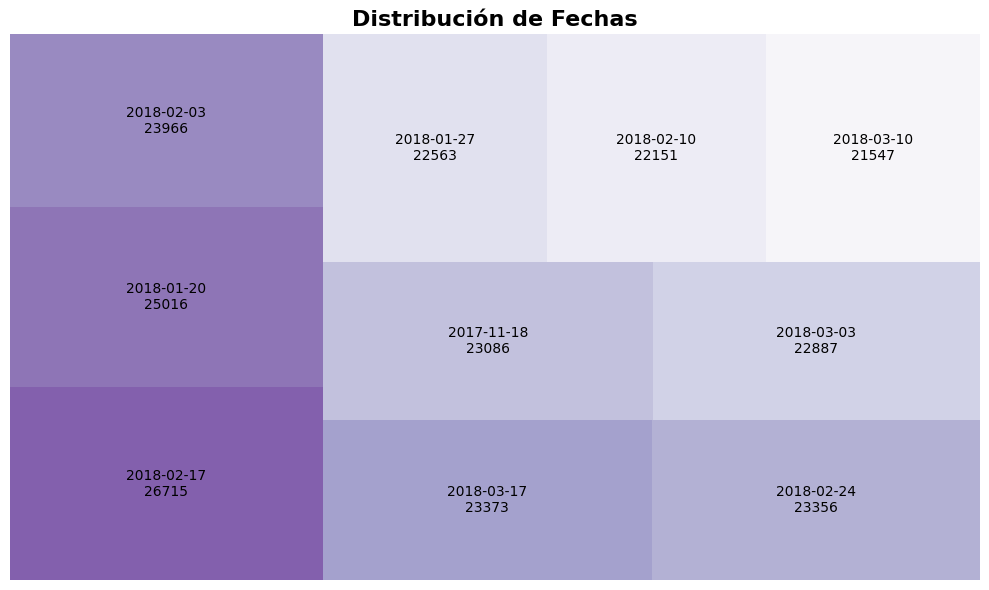

In [12]:
count = df_encoded_traindata['S_2'].value_counts()
top_5_counts = count.head(10)
values = top_5_counts.values
labels = [f'{cell}\n{count}' for cell, count in zip(top_5_counts.index, top_5_counts.values)]
colors = sns.color_palette("Purples_r", len(values))
# Crear el gráfico
plt.figure(figsize=(10, 6))
squarify.plot(sizes=values, label=labels, color=colors, alpha=0.7)
plt.axis("off")
plt.title("Distribución de Fechas", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

Se realizó una gráfica para poder analizar las 10 fechas con más observaciones de nuestro dataset y obtuvimos que el día con mas observaciónes fue el ``17-02-18`` seguido por ``20-01-18``.

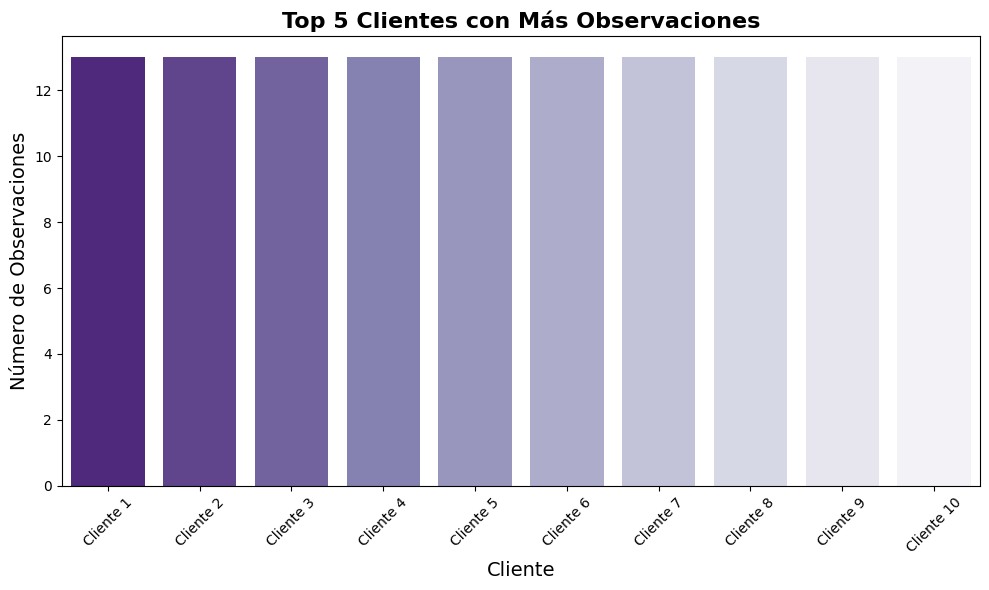

In [13]:
customer_counts = df_encoded_traindata['customer_ID'].value_counts()

# Seleccionar los 5 clientes con más observaciones
top_5_customers = customer_counts.head(10)
values = top_5_customers.values

# Cambiar los nombres a versiones más cortas
labels = [f'Cliente {i+1}' for i in range(len(top_5_customers))]

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=labels, y=values, palette="Purples_r")
plt.title("Top 5 Clientes con Más Observaciones", fontsize=16, fontweight='bold')
plt.xlabel("Cliente", fontsize=14)
plt.ylabel("Número de Observaciones", fontsize=14)
plt.xticks(rotation=45)  # Rotar las etiquetas para mejor visibilidad
plt.tight_layout()
plt.show()

Realizamos un diagrama de barras para ver los 10 clientes con mas observaciones de nuestro dataset y como se puede observar todos los 10 clientes cuentan con la misma cantidad de observaciones, aproximadamente 13 observaciones.